# Set up the environment

In [1]:
#!pip install -e . develop --user 
#!pip uninstall deap -y
#!pip install deap
#!pip install --user git+https://github.com/fun-zoological-computing/deap

#!git clone https://github.com/fun-zoological-computing/deap.git
#!cp deap/deap/tools/emo.py /home/russelljjarvis/.local/lib/python3.7/site-packages/deap/tools/emo.py
    
#!pip install --user git+https://github.com/scidash/sciunit@dev
#!pip install --user git+https://github.com/scidash/python-quantities@master#egg=quantitities-9999
#!pip install rickpy
import rickpy
from rickpy import ProgressBar

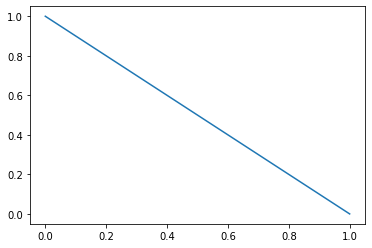

gets here
(-75, -56)
Import of badexp.ADEXPBackend failed due to:
No module named 'neuronunit.models.backends.badexp'
Import of bhh.BHHBackend failed due to:
No module named 'neuronunit.models.backends.bhh'
Import of general_pyNN.PYNNBackend failed due to:
No module named 'pyNN'


INFO:root:test
INFO:root:test


agg


In [2]:
import warnings
warnings.filterwarnings("ignore")
#warnings.filter()
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.plot([0,1],[1,0])
plt.show()
from neuronunit.unit_test.working import hide_imports
from neuronunit.optimisation.optimization_management import inject_and_plot_model, inject_and_plot_passive_model
plot_backend = mpl.get_backend()
print(plot_backend)
from neuronunit.optimisation.optimization_management import check_match_front



# Design simulated data tests

In [3]:
def jrt(use_test,backend):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = hide_imports.model_parameters.MODEL_PARAMS[backend]

    OM = hide_imports.OptMan(use_test,\
                backend=backend,\
                boundary_dict=edges,\
                protocol={'allen': False, 'elephant': True})

    return OM



In [4]:
test_frame = hide_imports.get_neab.process_all_cells()
test_frame.pop('Olfactory bulb (main) mitral cell',None)
stds = {}
for k,v in hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6']).items():
    temp = hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6'])[k]
    stds[k] = temp.observation['std']
    print((temp.name,temp.observation))
OMObjects = []
backends = ["RAW"]
import copy
cloned_tests = copy.copy(test_frame['Neocortex pyramidal cell layer 5-6'])
import copy
for b in backends:        
    OM = jrt(cloned_tests,b)
    OMObjects.append(OM)
rt_outs = []

('RheobaseTest', {'mean': array(213.84958333) * pA, 'std': array(170.45245472) * pA, 'n': 32})
('InputResistanceTest', {'mean': array(120.67207364) * Mohm, 'std': array(77.63316083) * Mohm, 'n': 86})
('TimeConstantTest', {'mean': array(15.73424242) * ms, 'std': array(7.31162637) * ms, 'n': 33})
('CapacitanceTest', {'mean': array(150.58416667) * pF, 'std': array(139.68388463) * pF, 'n': 12})
('RestingPotentialTest', {'mean': array(-68.24814346) * mV, 'std': array(6.53234788) * mV, 'n': 79})
('InjectedCurrentAPWidthTest', {'mean': array(1.20769388) * ms, 'std': array(0.53434592) * ms, 'n': 49})
('InjectedCurrentAPAmplitudeTest', {'mean': array(80.43510204) * mV, 'std': array(12.74880304) * mV, 'n': 49})
('InjectedCurrentAPThresholdTest', {'mean': array(-42.73572327) * mV, 'std': array(8.04073233) * mV, 'n': 53})


In [5]:
print(test_frame['Hippocampus CA1 pyramidal cell'])
print(test_frame['Neocortex pyramidal cell layer 5-6'])
print(len(test_frame),test_frame)

Suite_795403597886
Suite_957127215953
3 {'Hippocampus CA1 pyramidal cell': <sciunit.suites.TestSuite object at 0x7f8af427a208>, 'Cerebellum Purkinje cell': <sciunit.suites.TestSuite object at 0x7f8a96f88c18>, 'Neocortex pyramidal cell layer 5-6': <sciunit.suites.TestSuite object at 0x7f8a96f88e10>}


RAW
RheobaseTest
{'value': array(156.02769256) * pA} is this called?
InputResistanceTest
{'value': array(37276585.07464184) * kg*m**2/(s**3*A**2)} is this called?
TimeConstantTest
{'value': array(4.20292406) * ms} is this called?
CapacitanceTest
{'value': array(1.12749707e-10) * s**4*A**2/(kg*m**2)} is this called?
RestingPotentialTest
{'mean': array(-67.75940871) * mV, 'std': array(2.84217094e-14) * mV} is this called?
InjectedCurrentAPWidthTest
{'mean': array(0.00064) * s, 'std': array(0.) * s, 'n': 1} is this called?
InjectedCurrentAPAmplitudeTest
{'value': array(53.90582674) * mV, 'mean': array(53.90582674) * mV, 'std': array(0.) * mV, 'n': 1} is this called?
InjectedCurrentAPThresholdTest
{'mean': array(-22.81402163) * mV, 'std': array(0.) * mV, 'n': 1} is this called?
Random simulated data tests made


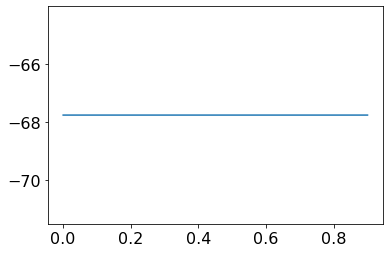

In [6]:
for OM in OMObjects:
   print(OM.backend)
   x= {k:v for k,v in OM.tests.items() if 'mean' in v.observation.keys() or 'value' in v.observation.keys()}
   cloned_tests = copy.copy(OM.tests)
   OM.tests = hide_imports.TSD(cloned_tests)
   rt_out = OM.simulate_data(OM.tests,OM.backend,OM.boundary_dict)
   #print(rt_out)


In [7]:
penultimate_tests = hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6'])
for k,v in penultimate_tests.items():
    temp = penultimate_tests[k]

    v = rt_out[1][k].observation
    v['std'] = stds[k]
simulated_data_tests = hide_imports.TSD(penultimate_tests)

# Show what the randomly generated target waveform the optimizer needs to find actually looks like

(AnalogSignal with 1 channels of length 90000; units mV; datatype float64 
 sampling rate: 100.0
 time: 0.0 to 0.9,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

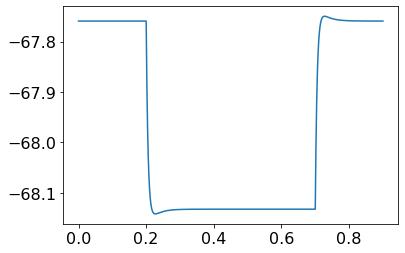

In [8]:
target = rt_out[0]
target.rheobase
inject_and_plot_model(target)

plt.clf()
inject_and_plot_passive_model(target)

In [ ]:
ga_out = simulated_data_tests.optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=40,NGEN=40,plot=True)
opt = ga_out['pf'][0].dtc
front = [ind.dtc for ind in ga_out['pf']]



In [ ]:
inject_and_plot_model(opt)
inject_and_plot_passive_model(opt)
check_match_front(target,front[0:10])
opt.obs_preds

In [ ]:
results = {}
tests = {}
for  k in simulated_data_tests.keys():
    tests[k] = hide_imports.TSD([simulated_data_tests[k]])
    results[k] = tests[k].optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
            protocol={'allen': False, 'elephant': True},\
                MU=40,NGEN=40,plot=True)
    dtc = results[k]['pf'][0].dtc
    display(dtc.obs_preds)
    

In [ ]:
results[k].keys()
plots = tests[k].elaborate_plots(tests[k],results[k])
dtc.obs_preds
#ga_out_rh.keys()


In [ ]:

#plots.keys()

# Comence optimization of models on simulated data sets

# first lets just optimize over single objective functions at a time.

In [ ]:

both = hide_imports.TSD([simulated_data_tests["TimeConstantTest"],simulated_data_tests["RheobaseTest"]]).optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=30,NGEN=30,plot=True)
both = both['pf'][0].dtc
both.obs_preds


In [ ]:

three = hide_imports.TSD([simulated_data_tests["InjectedCurrentAPAmplitudeTest"],simulated_data_tests["TimeConstantTest"],simulated_data_tests["RheobaseTest"]]).optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=25,NGEN=6,plot=True)


In [ ]:
#three = three['pf'][0].dtc
#three.obs_preds

# How about using all the objectives together?


In [ ]:
opt.rheobase


In [ ]:
model = opt.dtc_to_model()
score = simulated_data_tests['TimeConstantTest'].judge(model)
pred = simulated_data_tests['TimeConstantTest'].prediction
print(pred)

In [ ]:
from neuronunit.optimisation.algorithms import cleanse
seed_pop = cleanse(copy.copy(ga_out['pf'))
OMObjects.MU =6
ga_out = simulated_data_tests.optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=6,NGEN=6,seed_pop=seed_pop)

##### 